In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations


In [2]:
# Define a function to load the data from the csv files and merge them
def load_merge_data(file1, file2, merge_column):
    # Load the csv files into pandas dataframes
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Merge the dataframes on the common column
    # Using 'inner' as the merging method to keep only rows with matching values in both dataframes
    df_merged = pd.merge(df1, df2, on=merge_column, how='inner')

    # Return the merged dataframe
    return df_merged

# Specify the names of your csv files
file1 = 'Data\Instanbul.csv'
file2 = 'Data\Players.csv'

# Specify the common column to merge on
merge_column = 'Player'

# Call the function to load and merge the data
df_merged = load_merge_data(file1, file2, merge_column)
df_merged.to_csv('data/Enriched.csv', index=False)
# Save the merged dataframe as a new csv file
# Set index=False to exclude the index column in the output csv file


In [3]:
# Function to read CSV file
def read_csv_file(file_path):
    try:
        # Read CSV file into a pandas dataframe
        df = pd.read_csv(file_path, index_col=0)
        
        # Return the dataframe
        return df
    
    # Handle specific exceptions
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return None
    
    except pd.errors.EmptyDataError:
        print(f"The file {file_path} is empty.")
        return None
    
    except pd.errors.ParserError:
        print(f"Error parsing the file {file_path}.")
        return None
    
    # Handle generic exceptions
    except Exception as e:
        print(f"An error occurred while reading the file {file_path}. Details: {str(e)}")
        return None

# Function call to read CSV file
file_path = "data/Enriched.csv"
df = read_csv_file(file_path)


In [4]:
# Function to assert the type of a variable
def assert_type(variable, expected_type):
    # Use the assert statement to check if the variable is an instance of the expected type
    assert isinstance(variable, expected_type), f"Expected {expected_type.__name__}, got {type(variable).__name__}"
# The following line will raise an AssertionError if the type is not as expected
assert_type(df, pd.DataFrame)


In [5]:
# Replace empty strings with pd.NA (missing value) in the DataFrame
df.replace("", pd.NA, inplace=True)

# Remove dollar sign from 'Earnings' column and convert it to numeric
df['Earnings'] = df['Earnings'].str.replace('$', '')
df['Earnings'] = pd.to_numeric(df['Earnings'].replace('[\$,]', '', regex=True))

# Fill missing values in 'player_CL_percent' column with '0%' and convert to float
df['player_CL_percent'] = df['player_CL_percent'].fillna('0%')
df['player_CL_percent'] = df['player_CL_percent'].str.rstrip('%').astype('float') / 100.0

# Remove percentage sign and convert columns to float
df['player_HS'] = df['player_HS'].str.rstrip('%').astype('float') / 100.0
df['player_KAST'] = df['player_KAST'].str.rstrip('%').astype('float') / 100.0

# Fill missing values in numeric columns with 0
df['Gold'].fillna(0, inplace=True)
df['Silver'].fillna(0, inplace=True)
df['Bronze'].fillna(0, inplace=True)
df['S Tier'].fillna(0, inplace=True)

# Print a preview of the data
print("Preview of the data:")
print(df)


Preview of the data:
                                     player_url  player_RND  player_rating  \
Player                                                                       
yay           https://www.vlr.gg/player/881/yay         492           1.26   
kiNgg      https://www.vlr.gg/player/8549/kingg         179           1.26   
Laz           https://www.vlr.gg/player/999/laz         148           1.23   
pANcada   https://www.vlr.gg/player/683/pancada         366           1.21   
Derke      https://www.vlr.gg/player/5022/derke         319           1.20   
...                                         ...         ...            ...   
Khalil    https://www.vlr.gg/player/1711/khalil         113           0.77   
ANGE1       https://www.vlr.gg/player/109/ange1         357           0.75   
crow        https://www.vlr.gg/player/1000/crow         148           0.72   
Surf       https://www.vlr.gg/player/23062/surf         103           0.71   
BerserX  https://www.vlr.gg/player/4874/ber

In [6]:
# Display information about the DataFrame, including data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, yay to BerserX
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_url                   61 non-null     object 
 1   player_RND                   61 non-null     int64  
 2   player_rating                61 non-null     float64
 3   player_ACS                   61 non-null     float64
 4   player_KAST                  61 non-null     float64
 5   player_KD_ratio              61 non-null     float64
 6   player_ADR                   61 non-null     float64
 7   player_KPR                   61 non-null     float64
 8   player_APR                   61 non-null     float64
 9   player_FKPR                  61 non-null     float64
 10  player_FDPR                  61 non-null     float64
 11  player_HS                    61 non-null     float64
 12  player_CL_percent            61 non-null     float64
 13  player_CL           

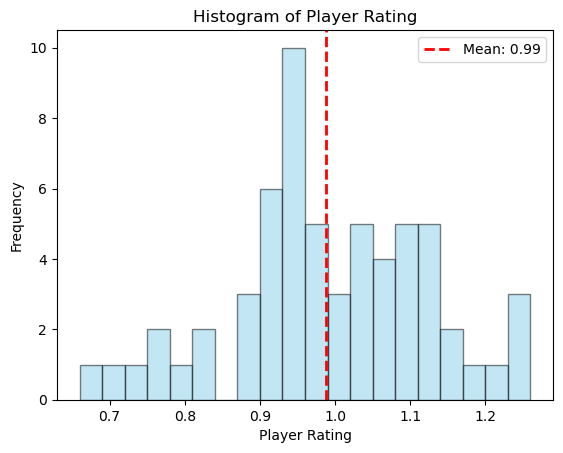

In [12]:
# Extract the 'player_rating' column from the DataFrame and drop NaN values
player_rating = df['player_rating'].dropna()  # Drop NaN values if any

# Plotting a histogram
plt.hist(player_rating, bins=20, alpha=0.5, color='skyblue', edgecolor='black')

# Calculate the mean of 'player_rating'
mean_rating = player_rating.mean()

# Adding a vertical mean line to the plot
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rating:.2f}')

# Adding labels and title to the plot
plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Player Rating')

# Adding a legend to the plot
plt.legend()

# Display the plot
plt.show()


# The distribution of ratings is a normal bell shape as can be expected 

In [13]:
#Calculate the Mean, Median and Standard Deviation Of Player rating
median_rating = player_rating.median()
std_rating = player_rating.mean()
print("Mean Player Rating:", mean_rating)
print("Median Player Rating:", median_rating)
print("Player Rating Std:", std_rating)

Mean Player Rating: 0.9881967213114754
Median Player Rating: 0.98
Player Rating Std: 0.9881967213114754


As shown by bot the mean and median, the average player rating is 0.98 with a standard deviation of about 0.99. This shows that the player ratings in geeral range from +- 0.99 of the mean across the dataset

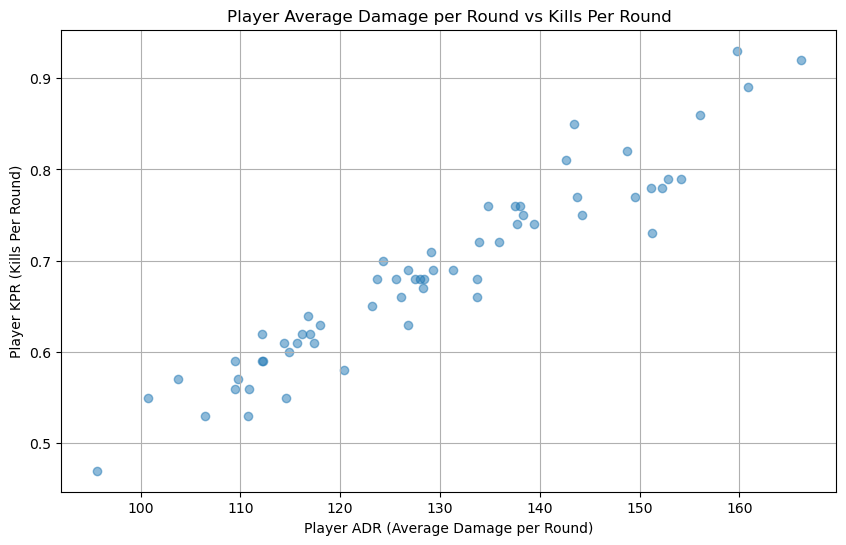

In [8]:

# Extract 'player_ADR' and 'player_KPR' columns from the DataFrame
player_adr = df['player_ADR']
player_kpr = df['player_KPR']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(player_adr, player_kpr, alpha=0.5)

# Adding labels and title to the plot
plt.title('Player Average Damage per Round vs Kills Per Round')
plt.xlabel('Player ADR (Average Damage per Round)')
plt.ylabel('Player KPR (Kills Per Round)')
plt.grid(True)  # Display grid lines on the plot

# Display the plot
plt.show()



 Players who tend to have a higher average damage per round also tend to have a higher average kill per round, this scatter plot shows a positive correlation

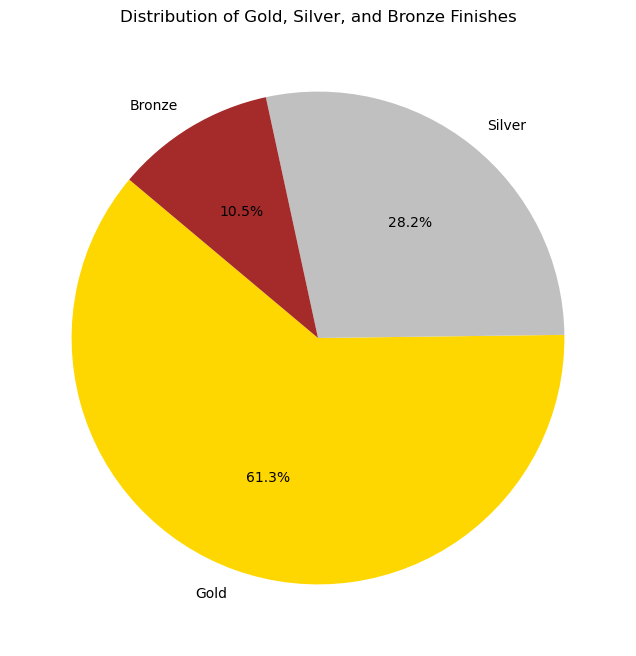

In [15]:
# List of columns representing medal counts: 'Gold', 'Silver', and 'Bronze'
medal_columns = ['Gold', 'Silver', 'Bronze']

# Convert the values in the medal columns to numeric, coercing errors to NaN
df[medal_columns] = df[medal_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the medal columns
df = df.dropna(subset=medal_columns)

# Calculate the total count of Gold, Silver, and Bronze finishes
medal_counts = df[medal_columns].sum()

# Data for the pie chart
medal_labels = medal_counts.index

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(medal_counts, labels=medal_labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'silver', 'brown'])
plt.title('Distribution of Gold, Silver, and Bronze Finishes')

# Display the pie chart
plt.show()


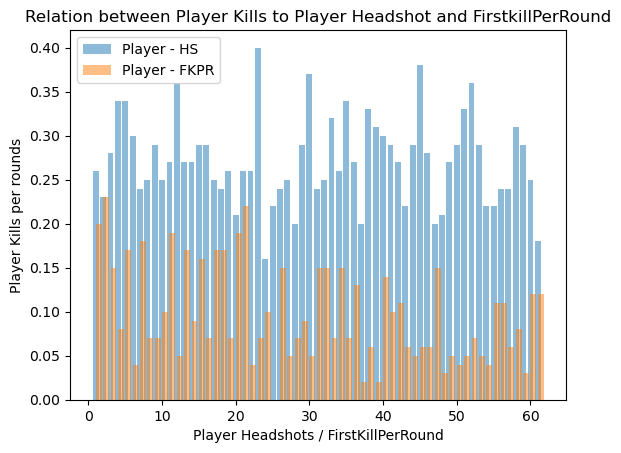

In [10]:
# Extracting 'player_KPR', 'player_FKPR', and 'player_HS' columns as lists
player_KPR = df['player_KPR'].tolist()
player_FKPR = df['player_FKPR'].tolist()
player_HS = df['player_HS'].tolist()

# Creating x-axis values for player_HS and player_FKPR, with a slight shift for better visibility
x_values_HS = range(1, len(player_HS) + 1)
x_values_FKPR = [val + 0.4 for val in x_values_HS]

# Plotting bar chart for 'player_HS' and 'player_FKPR' with increased line size
plt.bar(x_values_HS, player_HS, width=0.8, alpha=0.5, label='Player - HS')
plt.bar(x_values_FKPR, player_FKPR, width=0.8, alpha=0.5, label='Player - FKPR')

# Adding labels and title to the plot
plt.xlabel('Player Headshots / FirstKillPerRound')
plt.ylabel('Player Kills per rounds')
plt.title('Relation between Player Kills to Player Headshot and FirstkillPerRound')

# Adding legend to distinguish between 'player_HS' and 'player_FKPR'
plt.legend()

# Display the plot
plt.show()


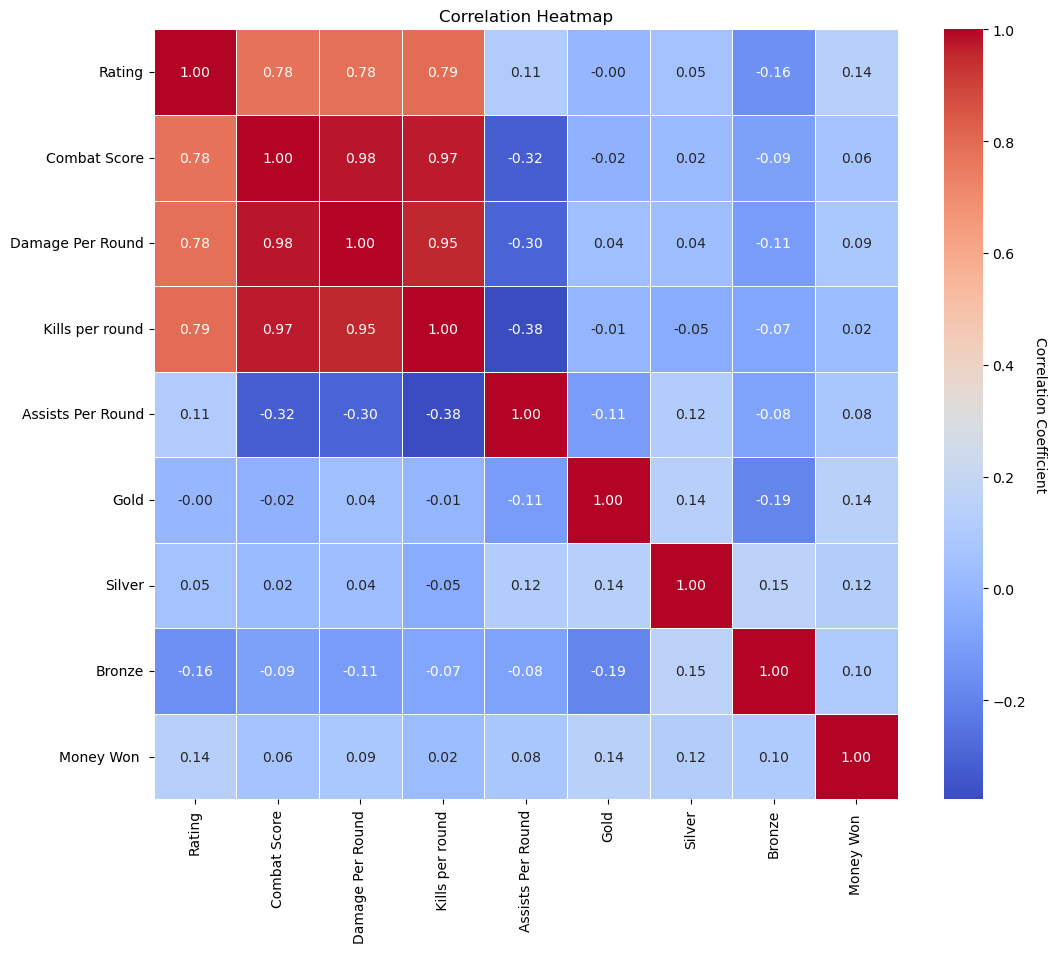

In [20]:
# Select relevant columns for correlation analysis
selected_columns = ['player_rating', 'player_ACS', 'player_ADR', 'player_KPR', 'player_APR', 'Gold', 'Silver', 'Bronze', 'Earnings']
corr_df = df[selected_columns]

# Custom labels for the short forms
custom_labels = ['Rating', 'Combat Score', 'Damage Per Round', ' Kills per round', 'Assists Per Round', 'Gold', 'Silver', 'Bronze', 'Money Won ']

# Calculate correlation matrix
correlation_matrix = corr_df.corr()

# Create a heatmap with custom labels
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, xticklabels=custom_labels, yticklabels=custom_labels)

# Add color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

plt.title('Correlation Heatmap')
plt.show()

As expected, Combat score and damage per round have the highest correlation at 0.98. This shows that the higher one's damage per round is, the higher their combat score will be. The highest negative correlation at -0.38 is between kills per round and assists per round